In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import decomposition
from sklearn import preprocessing
from scipy.stats import multivariate_normal
from math import pi
from matplotlib.path import Path
import matplotlib.patches as patches
from scipy.interpolate import griddata

colors = plt.cm.tab10.colors

plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Times New Roman"

plt.rcParams['mathtext.rm']  = 'serif'
plt.rcParams['mathtext.it']  = 'serif:italic'
plt.rcParams['mathtext.bf']  = 'serif:bold'
plt.rcParams['mathtext.fontset'] = 'custom'

In [2]:
# Load the force, virual displacement and virtual velocity profiles
with open('./data/force','rb') as f:
    force = pickle.load(f)
with open('./data/virtual_displacement','rb') as f:
    virtual_displacement = pickle.load(f)
with open('./data/virtual_velocity','rb') as f:
    virtual_velocity = pickle.load(f)

# Expert evaluation of trials 
Expert_A_score = np.array([3,1,0,2,1,0,3,3,1,2,1,3,0,2,2])
Expert_B_score = np.array([1,2,1,2,3,0,1,2,3,1,3,2,0,3,2])
Expert_C_score = np.array([3,1,0,2,3,0,1,2,3,3,1,2,0,1,3])
Expert_D_score = np.array([1,1,1,2,3,0,2,3,3,2,1,2,0,0,3])

# Subject designators, in order of the trials
subject_names = ['A1','B','C1','D1','E','F','G','A2','H','I','J','D2','C2','K','L','T','SA','SB']

T = 120 # total number of samples per excision used in the analysis
dt = 0.0333 # sampling time
Num_models = len(subject_names)
Num_cuts = 12 # number of excisions per trial

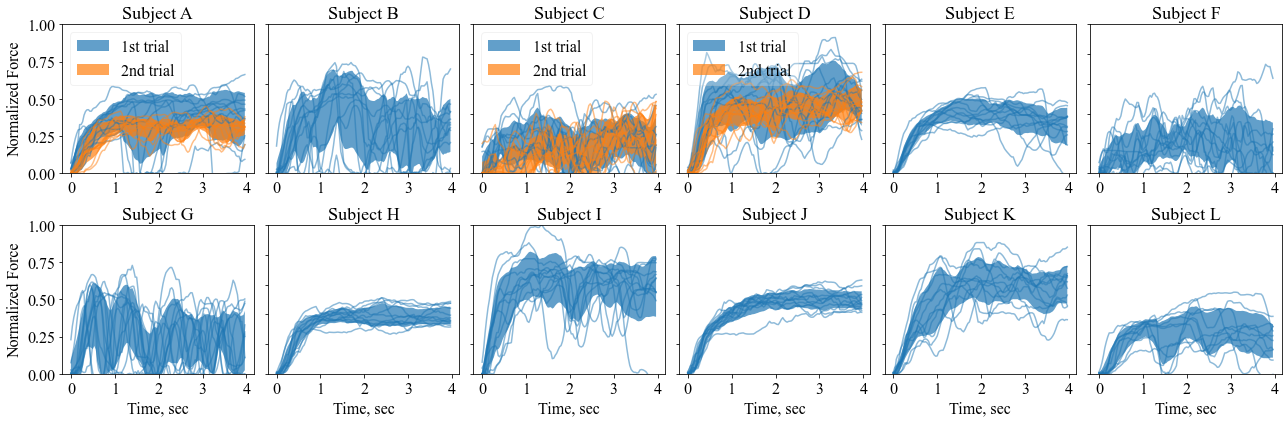

In [3]:
t = np.arange(0,T*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(force[7][:,:T],axis=0)
        data_std2 = np.std(force[7][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(force[7].shape[0]):
            plt.plot(t,force[7][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(force[12][:,:T],axis=0)
        data_std2 = np.std(force[12][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(force[12].shape[0]):
            plt.plot(t,force[12][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(force[11][:,:T],axis=0)
        data_std2 = np.std(force[11][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(force[11].shape[0]):
            plt.plot(t,force[11][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(force[subject][:,:T],axis=0)
        data_std = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
#         plt.plot(t,data_mean)
        
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
        
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Normalized Force', fontsize=16)
    plt.ylim([0,1])
#     if subject == 1:
#         plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
#     plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
# plt.savefig('./figures/force_profiles.pdf') 
plt.show()

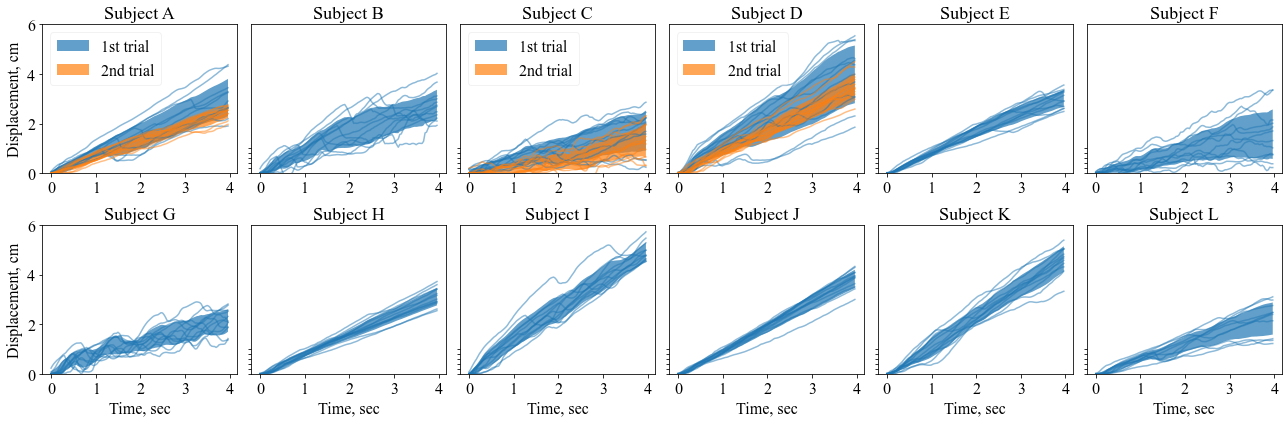

In [4]:
t = np.arange(0,T*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std1 = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_displacement[7][:,:T],axis=0)
        data_std2 = np.std(virtual_displacement[7][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_displacement[7].shape[0]):
            plt.plot(t,virtual_displacement[7][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std1 = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_displacement[12][:,:T],axis=0)
        data_std2 = np.std(virtual_displacement[12][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_displacement[12].shape[0]):
            plt.plot(t,virtual_displacement[12][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std1 = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_displacement[11][:,:T],axis=0)
        data_std2 = np.std(virtual_displacement[11][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_displacement[11].shape[0]):
            plt.plot(t,virtual_displacement[11][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
#         plt.plot(t,data_mean)
        
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
        
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Displacement, cm', fontsize=16)
    plt.ylim([0,6])
#     if subject == 1:
#         plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
#     plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
# plt.savefig('./figures/virtual_displacement_profiles.pdf') 
plt.show()

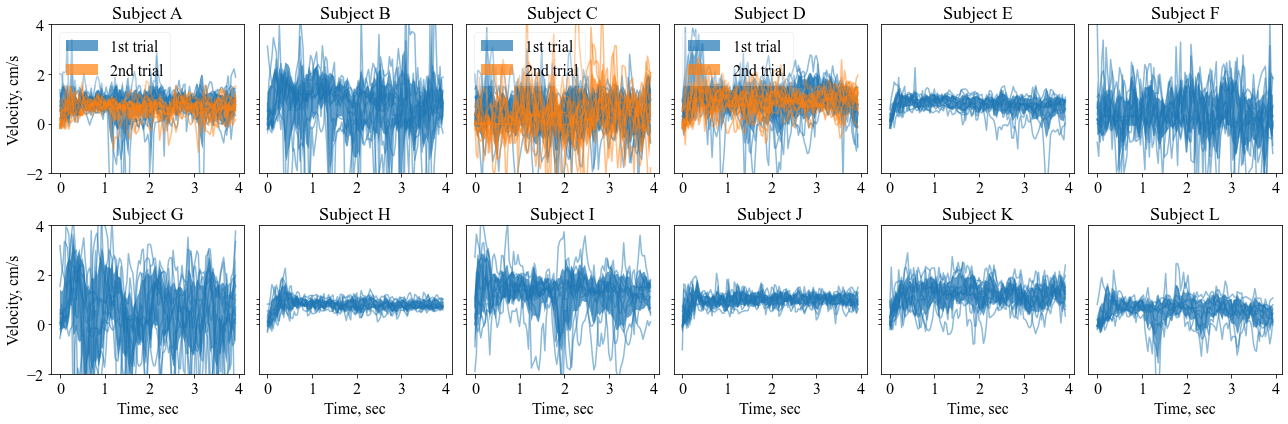

In [5]:
t = np.arange(0,(T-1)*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std1 = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_velocity[7][:,:T-1],axis=0)
        data_std2 = np.std(virtual_velocity[7][:,:T-1],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_velocity[7].shape[0]):
            plt.plot(t,virtual_velocity[7][cut,:T-1], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std1 = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_velocity[12][:,:T-1],axis=0)
        data_std2 = np.std(virtual_velocity[12][:,:T-1],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_velocity[12].shape[0]):
            plt.plot(t,virtual_velocity[12][cut,:T-1], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std1 = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_velocity[11][:,:T-1],axis=0)
        data_std2 = np.std(virtual_velocity[11][:,:T-1],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_velocity[11].shape[0]):
            plt.plot(t,virtual_velocity[11][cut,:T-1], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
#         plt.plot(t,data_mean)
        
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
        
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Velocity, cm/s', fontsize=16)
    plt.ylim([-2,4])
#     if subject == 1:
#         plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
#     plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
# plt.savefig('./figures/virtual_velocity_profiles.pdf') 
plt.show()

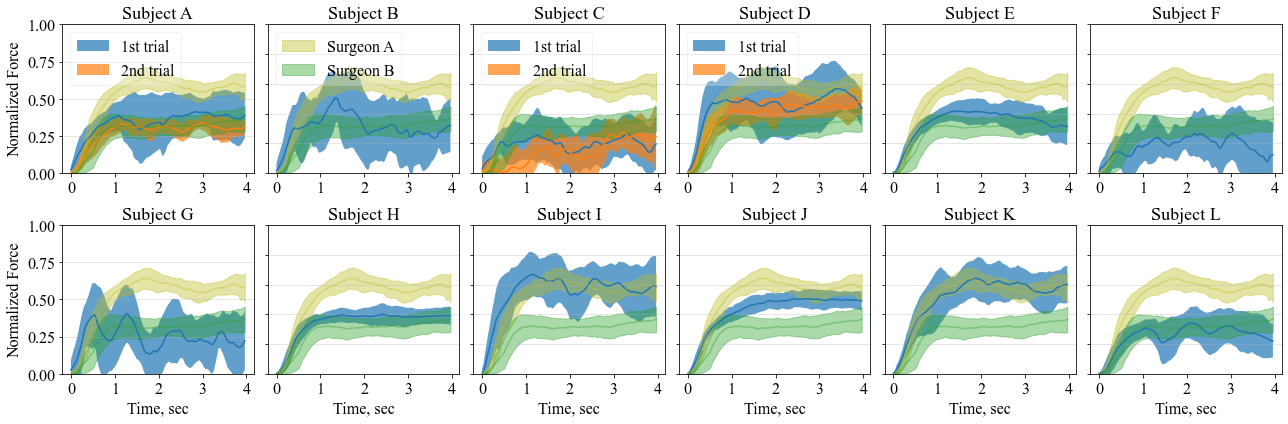

In [6]:
t = np.arange(0,T*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
        plt.plot(t,data_mean1)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
        data_mean2 = np.mean(force[7][:,:T],axis=0)
        data_std2 = np.std(force[7][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
        plt.plot(t,data_mean2)
#         for cut in range(force[7].shape[0]):
#             plt.plot(t,force[7][cut,:T], color='tab:orange',alpha=0.7)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
        plt.plot(t,data_mean1)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
        data_mean2 = np.mean(force[12][:,:T],axis=0)
        data_std2 = np.std(force[12][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
        plt.plot(t,data_mean2)
#         for cut in range(force[12].shape[0]):
#             plt.plot(t,force[12][cut,:T], color='tab:orange',alpha=0.7)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
        plt.plot(t,data_mean1)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
        data_mean2 = np.mean(force[11][:,:T],axis=0)
        data_std2 = np.std(force[11][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
        plt.plot(t,data_mean2)
#         for cut in range(force[11].shape[0]):
#             plt.plot(t,force[11][cut,:T], color='tab:orange',alpha=0.7)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(force[subject][:,:T],axis=0)
        data_std = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
        plt.plot(t,data_mean)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
    Surgeon_B_mean = np.mean(force[17][:,:T],axis=0)
    Surgeon_B_std = np.std(force[17][:,:T],axis=0)
    
    Surgeon_A_mean = np.mean(force[16][:,:T],axis=0)
    Surgeon_A_std = np.std(force[16][:,:T],axis=0)
    
    plt.fill_between(t,Surgeon_A_mean+Surgeon_A_std,Surgeon_A_mean-Surgeon_A_std, alpha=0.4, color='tab:olive', label='Surgeon A')
    plt.plot(t,Surgeon_A_mean, color='tab:olive', alpha=0.4)
    
    plt.fill_between(t,Surgeon_B_mean+Surgeon_B_std,Surgeon_B_mean-Surgeon_B_std, alpha=0.4, color='tab:green', label='Surgeon B')
    plt.plot(t,Surgeon_B_mean,color='tab:green', alpha=0.4)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
    
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Normalized Force', fontsize=16)
    plt.ylim([0,1])
    if subject == 1:
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
    plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
# plt.savefig('./figures/force_distributions.pdf') 
plt.show()

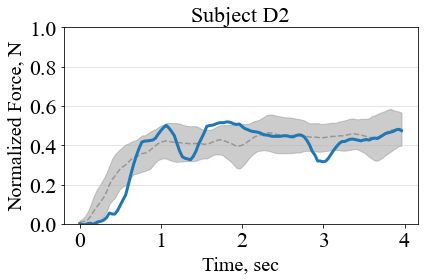

In [7]:
subject_of_interest = 'D2'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][2,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
# plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf') 

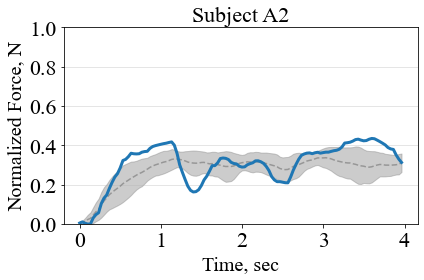

In [8]:
subject_of_interest = 'A2'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][2,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
# plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf')

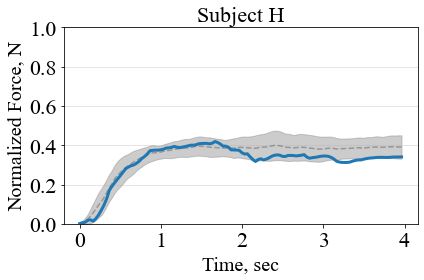

In [9]:
subject_of_interest = 'H'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][2,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
# plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf')

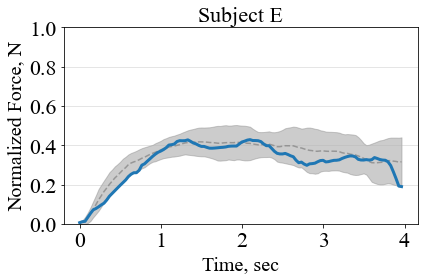

In [10]:
subject_of_interest = 'E'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][3,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
# plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf')

# Expert evaluation boxplots

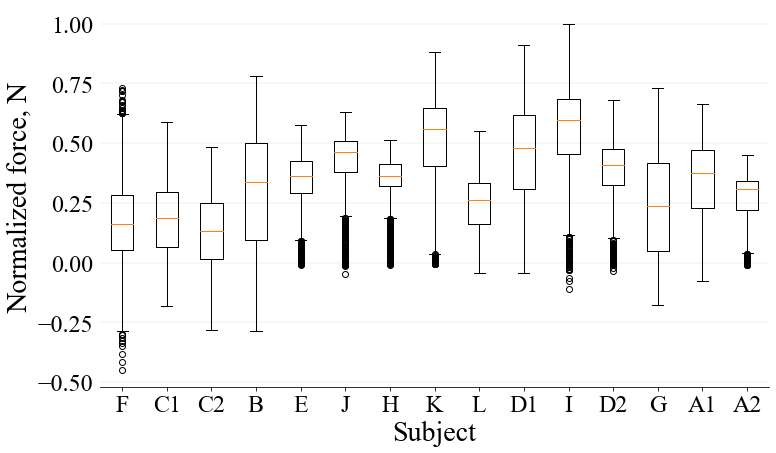

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_A = []

# Sort by evaluation score
for subject in [5,2,12,1,4,10,8,13,14,3,9,11,6,0,7]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_A.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_A)
ax.tick_params(axis='both', labelsize=24)

# plt.savefig('./figures/Expert_A_boxplot.pdf') 
plt.show()

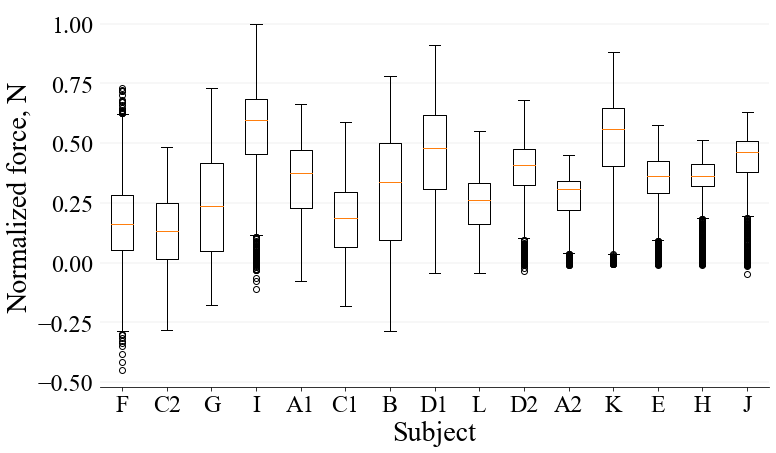

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_B = []

# Sort by evaluation score
for subject in [5,12,6,9,0,2,1,3,14,11,7,13,4,8,10]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_B.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_B)
ax.tick_params(axis='both', labelsize=24)

# plt.savefig('./figures/Expert_B_boxplot.pdf') 
plt.show()

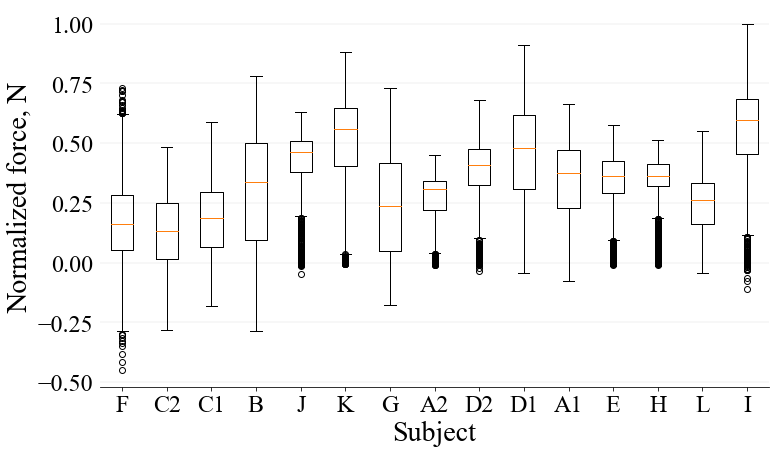

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_C = []

# Sort by evaluation score
for subject in [5,12,2,1,10,13,6,7,11,3,0,4,8,14,9]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_C.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_C)
ax.tick_params(axis='both', labelsize=24)

plt.savefig('./figures/Expert_C_boxplot.pdf') 
plt.show()

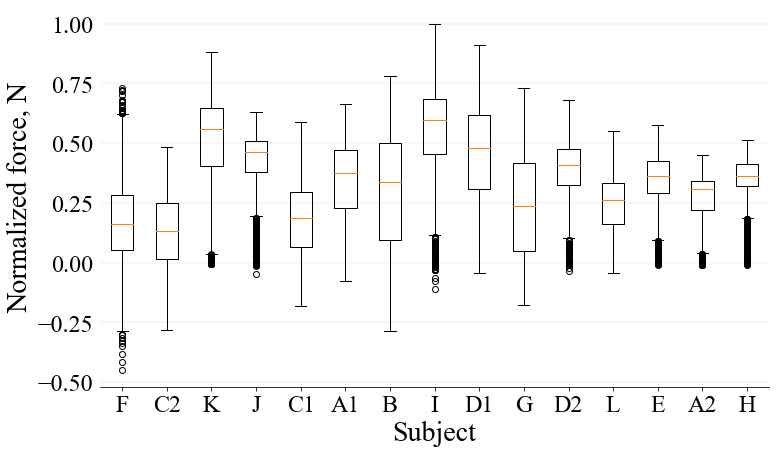

In [14]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_D = []

# Sort by evaluation score
for subject in [5,12,13,10,2,0,1,9,3,6,11,14,4,7,8]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_D.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_D)
ax.tick_params(axis='both', labelsize=24)

# plt.savefig('./figures/Expert_D_boxplot.pdf') 
plt.show()

# Elliptical excision force model

In [15]:
from hmmlearn import hmm

# Fit Gaussian HHM model to the virtual velocity profiles
K = 2 # Number of regimes
Models = []
for subject in range(Num_models):
    model_ = hmm.GaussianHMM(n_components=K, covariance_type="full", n_iter=100, min_covar=0.000001)
    model_.fit(virtual_velocity[subject].reshape(-1,1), 
               (T-1)*np.ones(virtual_velocity[subject].shape[0],dtype='int32'))  
    Models.append(model_)

In [16]:
# Model update step
def step(z,regime,dt):
    
    alpha = -2.0
    beta = 1.0
    gamma = -2.0
    delta = 1.0
    
    A = np.array([[alpha,beta,0.0],[0.0,0.0,regime],[0.0,0.0,0.0]])
    C = np.array([gamma,delta,0.0])
    
    z_new = z + np.matmul(A,z)*dt
    y = np.matmul(C,z)
    
    return z_new, y

# Generate synthetic force profiles
virtual_velocity_gen = np.zeros([Num_models,Num_cuts,T-1])
virtual_displacement_gen  = np.zeros([Num_models,Num_cuts,T-1])
force_gen  = np.zeros([Num_models,Num_cuts,T-1])

for subject in range(Num_models):
    for cut in range(Num_cuts):
        
        # Sample virtual velocity profiles from trained model
        virtual_velocity_sample, _ = Models[subject].sample(T-1)
        virtual_velocity_sample = virtual_velocity_sample.reshape(-1)
        
        # Integrate the Maxwell model
        Z = [np.array([0,0,1])] # hidden state
        Y = [] # observable (force)
        for n in range(virtual_velocity_sample.shape[0]):
            z, y = step(Z[-1],virtual_velocity_sample[n],dt)
            Z.append(z)
            Y.append(y)
        
        force_gen[subject,cut,:] = np.array(Y)
        virtual_displacement_gen[subject,cut,:] = np.array(Z)[:-1,1]
        virtual_velocity_gen[subject,cut,:] = virtual_velocity_sample

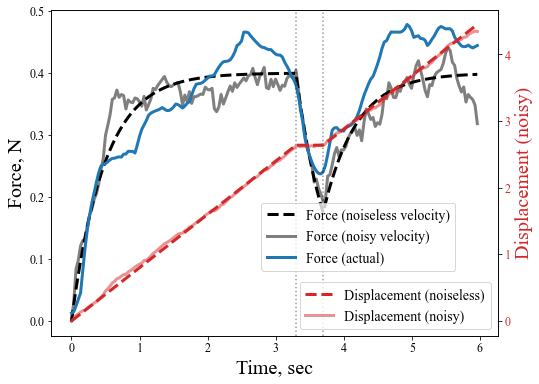

In [17]:
import matplotlib.font_manager as font_manager
csfont = {'fontname':'Times New Roman'}
font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=14)

N = 180
t = np.arange(0,N*0.0333,0.0333)
v = np.ones(N)*0.8
# v[np.max(np.where(t<1)[0]):] = 1
v[np.max(np.where(t<3.3)[0]):] = 0
v[np.max(np.where(t<3.7)[0]):] = 0.8
v_noise = v + 0.35*np.random.randn(N)

state = [np.array([0,0,1])]
output = []

state_noise = [np.array([0,0,1])]
output_noise = []

for i in range(v.shape[0]):
    
    x, y = step(state[-1],v[i],0.0333)
    state.append(x)
    output.append(y)
    
    x, y = step(state_noise[-1],v_noise[i],0.0333)
    state_noise.append(x)
    output_noise.append(y)

fig, ax1 = plt.subplots(figsize=(8,6))
plt.plot(t,np.array(output),'--',lw=3,c='k',label='Force (noiseless velocity)')
plt.plot(t,np.array(output_noise),lw=3,c='k',alpha=0.5,
        label='Force (noisy velocity)')
plt.plot(t,force[4][0,:],lw=3,label='Force (actual)')
ax1.set_ylabel('Force, N',**csfont,c='k',size=20)
ax1.tick_params(labelcolor='k',labelsize=12)
ax1.set_xlabel('Time, sec',**csfont,size=20)
ax1.axvline(x=3.3,ls=':',c='k',alpha=0.4)
ax1.axvline(x=3.7,ls=':',c='k',alpha=0.4)
plt.legend(prop=font,loc=(0.47,0.2))

ax2 = ax1.twinx()
plt.plot(t,np.array(state)[:-1,1],'--',c='C3',lw=3,
         label='Displacement (noiseless)')
ax2.set_ylabel('Displacement (noisy)',**csfont,c='C3',size=20)
ax2.tick_params(labelcolor='C3',labelsize=12)
plt.plot(t,np.array(state_noise)[:-1,1],c='C3',lw=3,alpha=0.5,
        label='Displacement (noisy)')

plt.legend(prop=font,loc='lower right')

# fig.savefig("./figures/model_demo.pdf", bbox_inches='tight')

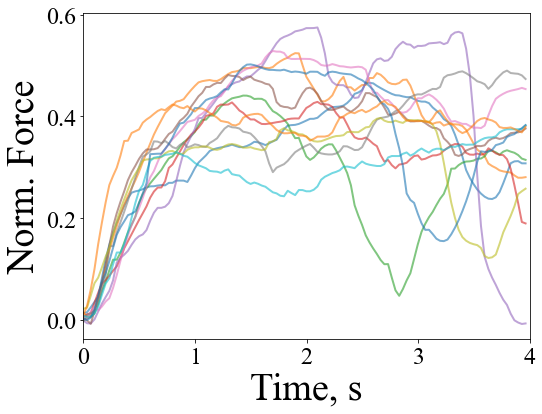

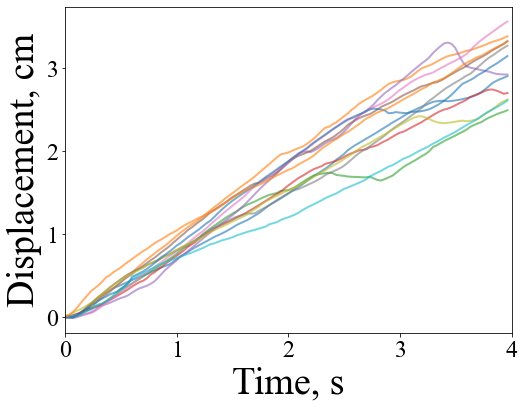

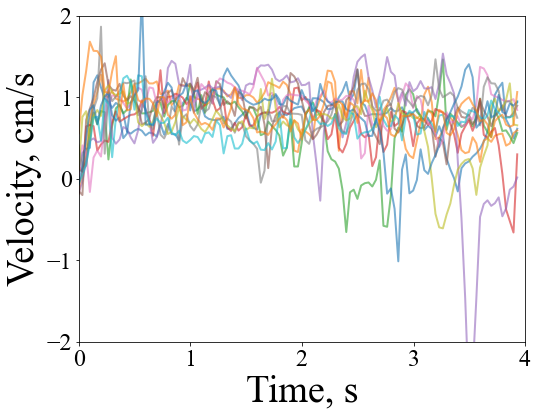

In [18]:
import matplotlib.font_manager as font_manager

subject_of_interest = 4
t = np.arange(0,T*dt,dt)

csfont = {'fontname':'Times New Roman'}
font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=14)

plt.figure(figsize=(8,6))
for cut in range(Num_cuts):
    plt.plot(t,force[subject_of_interest][cut,:T],lw=2,alpha=0.6)
plt.ylabel('Norm. Force',**csfont,c='k',size=38)
plt.xlabel('Time, s',**csfont,c='k',size=38)
plt.tick_params(labelsize=24)
plt.xlim([0,4])
# plt.savefig("./figures/overview_force.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,6))
for cut in range(Num_cuts):
    plt.plot(t,virtual_displacement[subject_of_interest][cut,:T],lw=2,alpha=0.6)
plt.ylabel('Displacement, cm',**csfont,c='k',size=38)
plt.xlabel('Time, s',**csfont,c='k',size=38)
plt.tick_params(labelsize=24)
plt.xlim([0,4])
# plt.savefig("./figures/overview_displacement.pdf", bbox_inches='tight')
plt.show()
    
plt.figure(figsize=(8,6))
for cut in range(Num_cuts):
    plt.plot(t[:-1],virtual_velocity[subject_of_interest][cut,:T-1],lw=2,alpha=0.6)
plt.ylabel('Velocity, cm/s',**csfont,c='k',size=38)
plt.xlabel('Time, s',**csfont,c='k',size=38)
plt.tick_params(labelsize=24)
plt.ylim([-2,2])
plt.xlim([0,4])
# plt.savefig("./figures/velocity.pdf", bbox_inches='tight')
plt.show()

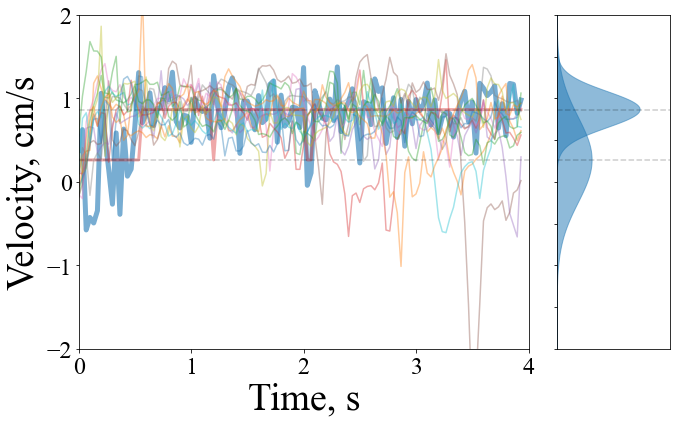

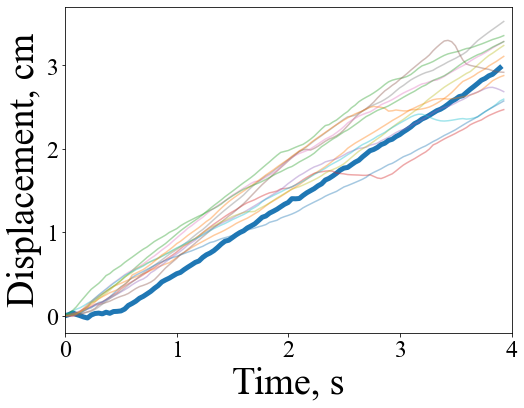

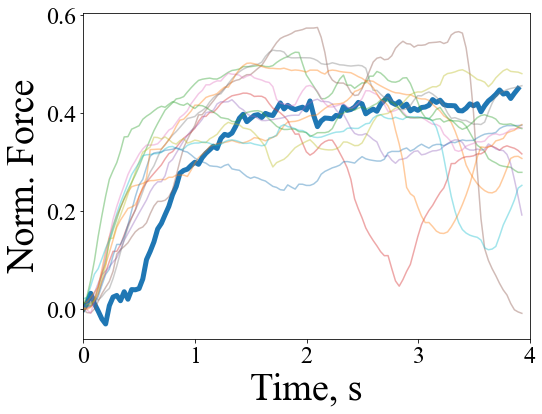

In [19]:
from scipy.stats import norm

t = np.arange(0,T*dt-dt,dt)
m_ = Models[subject_of_interest]

virtual_velocity_sample, regime = m_.sample(T-1)
virtual_velocity_sample = virtual_velocity_sample.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(9.5,6), gridspec_kw={'width_ratios': [4, 1]})

ax[0].plot(t[:],virtual_velocity_sample,lw=5,alpha=0.6)
ax[0].plot(t[:],m_.means_[regime].reshape(-1),lw=3,c='C3',alpha=0.4)
if subject_of_interest == 2:
    plt.legend(['latent strain rate','strain rate emission'])
    
for cut in range(Num_cuts):
    ax[0].plot(t,virtual_velocity[subject_of_interest][cut,:], alpha=0.4)

ax[0].set_ylabel('Velocity, cm/s',**csfont,size=38)
ax[0].set_xlabel('Time, s',**csfont,size=38)

Z = [np.array([0,0,1])]
Y = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],virtual_velocity_sample[i],0.0333)
    Z.append(z)
    Y.append(y)
ax[0].set_ylim([-2,2])
ax[0].set_xlim([0,4])


x_axis = np.arange(-3, 3, 0.001)
for i in range(K):
    ax[1].fill(norm.pdf(x_axis,Models[subject_of_interest].means_[i],np.sqrt(Models[subject_of_interest].covars_[i])).reshape(-1), 
           x_axis,
           alpha=0.5,
           c='C0')

ax[1].set_xlim([0,2.5])
ax[1].set_ylim([-2,2])

for i in range(K):
    ax[0].axhline(y=Models[subject_of_interest].means_[i],ls='--',c='k',alpha=0.2)
    ax[1].axhline(y=Models[subject_of_interest].means_[i],ls='--',c='k',alpha=0.2)

ax[0].tick_params(labelsize=24)
ax[1].yaxis.set_ticklabels([])
ax[1].xaxis.set_ticklabels([])
ax[1].xaxis.set_ticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0) 
# plt.savefig("./figures/overview_velocity_gen.pdf", bbox_inches='tight')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(t[:-1],np.array(Z)[:-1,1],lw=5)

for cut in range(Num_cuts):
    plt.plot(t,virtual_displacement[subject_of_interest][cut,:-1], alpha=0.4)
plt.ylabel('Displacement, cm',**csfont,size=38)
plt.xlabel('Time, s',**csfont,size=38)
plt.xlim([0,4])
plt.tick_params(labelsize=24)
# plt.savefig("./figures/overview_displacement_gen.pdf", bbox_inches='tight')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(t[:-1],np.array(Y),lw=5)

for cut in range(Num_cuts):
    plt.plot(t,force[subject_of_interest][cut,:T-1], alpha=0.4)
plt.ylabel('Norm. Force',**csfont,size=38)
plt.xlabel('Time, s',**csfont,size=38)
plt.xlim([0,4])
plt.tick_params(labelsize=24)
# plt.savefig("./figures/overview_force_gen.pdf", bbox_inches='tight')
plt.show()

# Model parameters

In [20]:
model_parameters = np.zeros([Num_models,K+K+K**2])
model_parameters_standard = np.zeros([Num_models,K+K+K**2])

for m in range(Num_models):
    
    model_ = Models[m]
    indx = np.argsort(Models[m].means_.reshape(-1)) # index of sorted regimes from lower to upper
    
    means_ = np.zeros(K)
    covars_ = np.zeros(K)
    Q = np.zeros([K,K])
    
    for k in range(K):
        means_[k] = model_.means_[indx[k]][0]
        covars_[k] = model_.covars_[indx[k]][0]
        Q[k,:] = model_.transmat_[indx[k],indx]
        
    model_parameters[m,:K] = means_
    model_parameters[m,K:2*K] = covars_
    model_parameters[m,2*K:] = Q.reshape(-1)
    

# Standardize parameters
import sklearn.preprocessing
scaler = preprocessing.StandardScaler().fit(model_parameters)
model_parameters_standard = scaler.transform(model_parameters)

C:\Users\honeycomb0\Miniconda3\envs\main\lib\site-packages\ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\honeycomb0\Miniconda3\envs\main\lib\site-packages\ipykernel_launcher.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


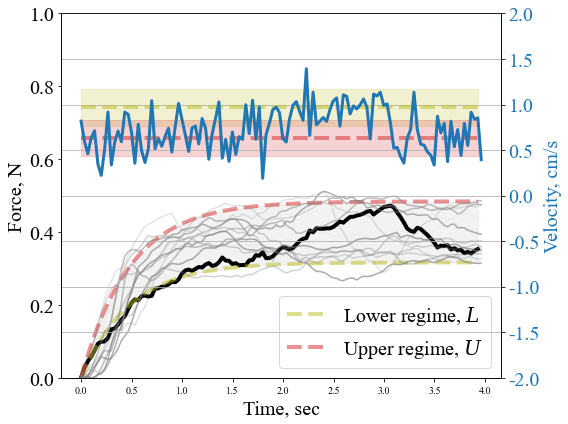

In [21]:
subject_of_interest = 'H' # change designator here, e.g. 'D2' or 'H'
t = np.arange(0,(T)*dt,dt)

subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]
m_ = Models[subj_]

# Sample the virtual velocity from the model
virtual_velocity_sample, _ = m_.sample(T)
virtual_velocity_sample = virtual_velocity_sample.reshape(-1)

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

# Integrate Maxwell model
Z = [np.array([0,0,1])] # hidden state
Y = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],virtual_velocity_sample[i],dt)
    Z.append(z)
    Y.append(y)

# Generate envelope
Z = [np.array([0,0,1])]
Y_top = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],model_parameters[subj_,0],dt)
    Z.append(z)
    Y_top.append(y)

Z = [np.array([0,0,1])]
Y_bot = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],model_parameters[subj_,1],dt)
    Z.append(z)
    Y_bot.append(y)


ax1.plot(t[:-1],np.array(Y),lw=4,c='k')

ax1.plot(t[:-1],np.array(Y_top),ls='--',lw=4,label='Lower regime, $\it{L}$',alpha=0.5,c=colors[8])
ax1.plot(t[:-1],np.array(Y_bot),ls='--',lw=4,label='Upper regime, $\it{U}$',alpha=0.5,c=colors[3])

ax1.fill_between(t[:-1],y1=np.array(Y_top),y2=np.array(Y_bot),color='gray',alpha=0.1)
for i in range(force[subj_].shape[0]):
    ax1.plot(t,force[subj_][i,:T], alpha=np.random.rand()*0.8, c='gray')

ax1.set_ylabel('Force, N',size=20,c='k')
ax1.set_xlabel('Time, sec',size=20)
ax1.set_yticklabels(np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]), fontsize=20, c='k')
ax1.set_ylim([0,1])
ax1.legend(loc='lower right',fontsize=20)


ax2.fill_between(t[:-1],y1=m_.means_[0]+np.sqrt(model_parameters[subj_,2]),y2=m_.means_[0]-np.sqrt(model_parameters[subj_,2]),alpha=0.2,color=colors[8])
ax2.plot(t[:-1],np.ones(t[:-1].shape[0])*m_.means_[0],lw=4,ls='--',alpha=0.5,color=colors[8])

ax2.fill_between(t[:-1],y1=m_.means_[1]+np.sqrt(model_parameters[subj_,3]),y2=m_.means_[1]-np.sqrt(model_parameters[subj_,3]),alpha=0.2,color=colors[3])
ax2.plot(t[:-1],np.ones(t[:-1].shape[0])*m_.means_[1],lw=4,ls='--',alpha=0.5,color=colors[3])

ax2.plot(t,virtual_velocity_sample,lw=3,alpha=1,color=colors[0])

ax2.set_ylabel('Velocity, cm/s',size=20,c=colors[0])
ax2.set_xlabel('Time, sec',size=20)
ax2.set_yticklabels(np.arange(-2,2.5,0.5), fontsize=20, c=colors[0])
ax2.set_ylim([-2,2])

plt.tight_layout()
plt.grid(axis='y')
# plt.savefig('./figures/'+str(subject_of_interest)+"_model_parameters_plot.pdf", bbox_inches='tight')
plt.show()

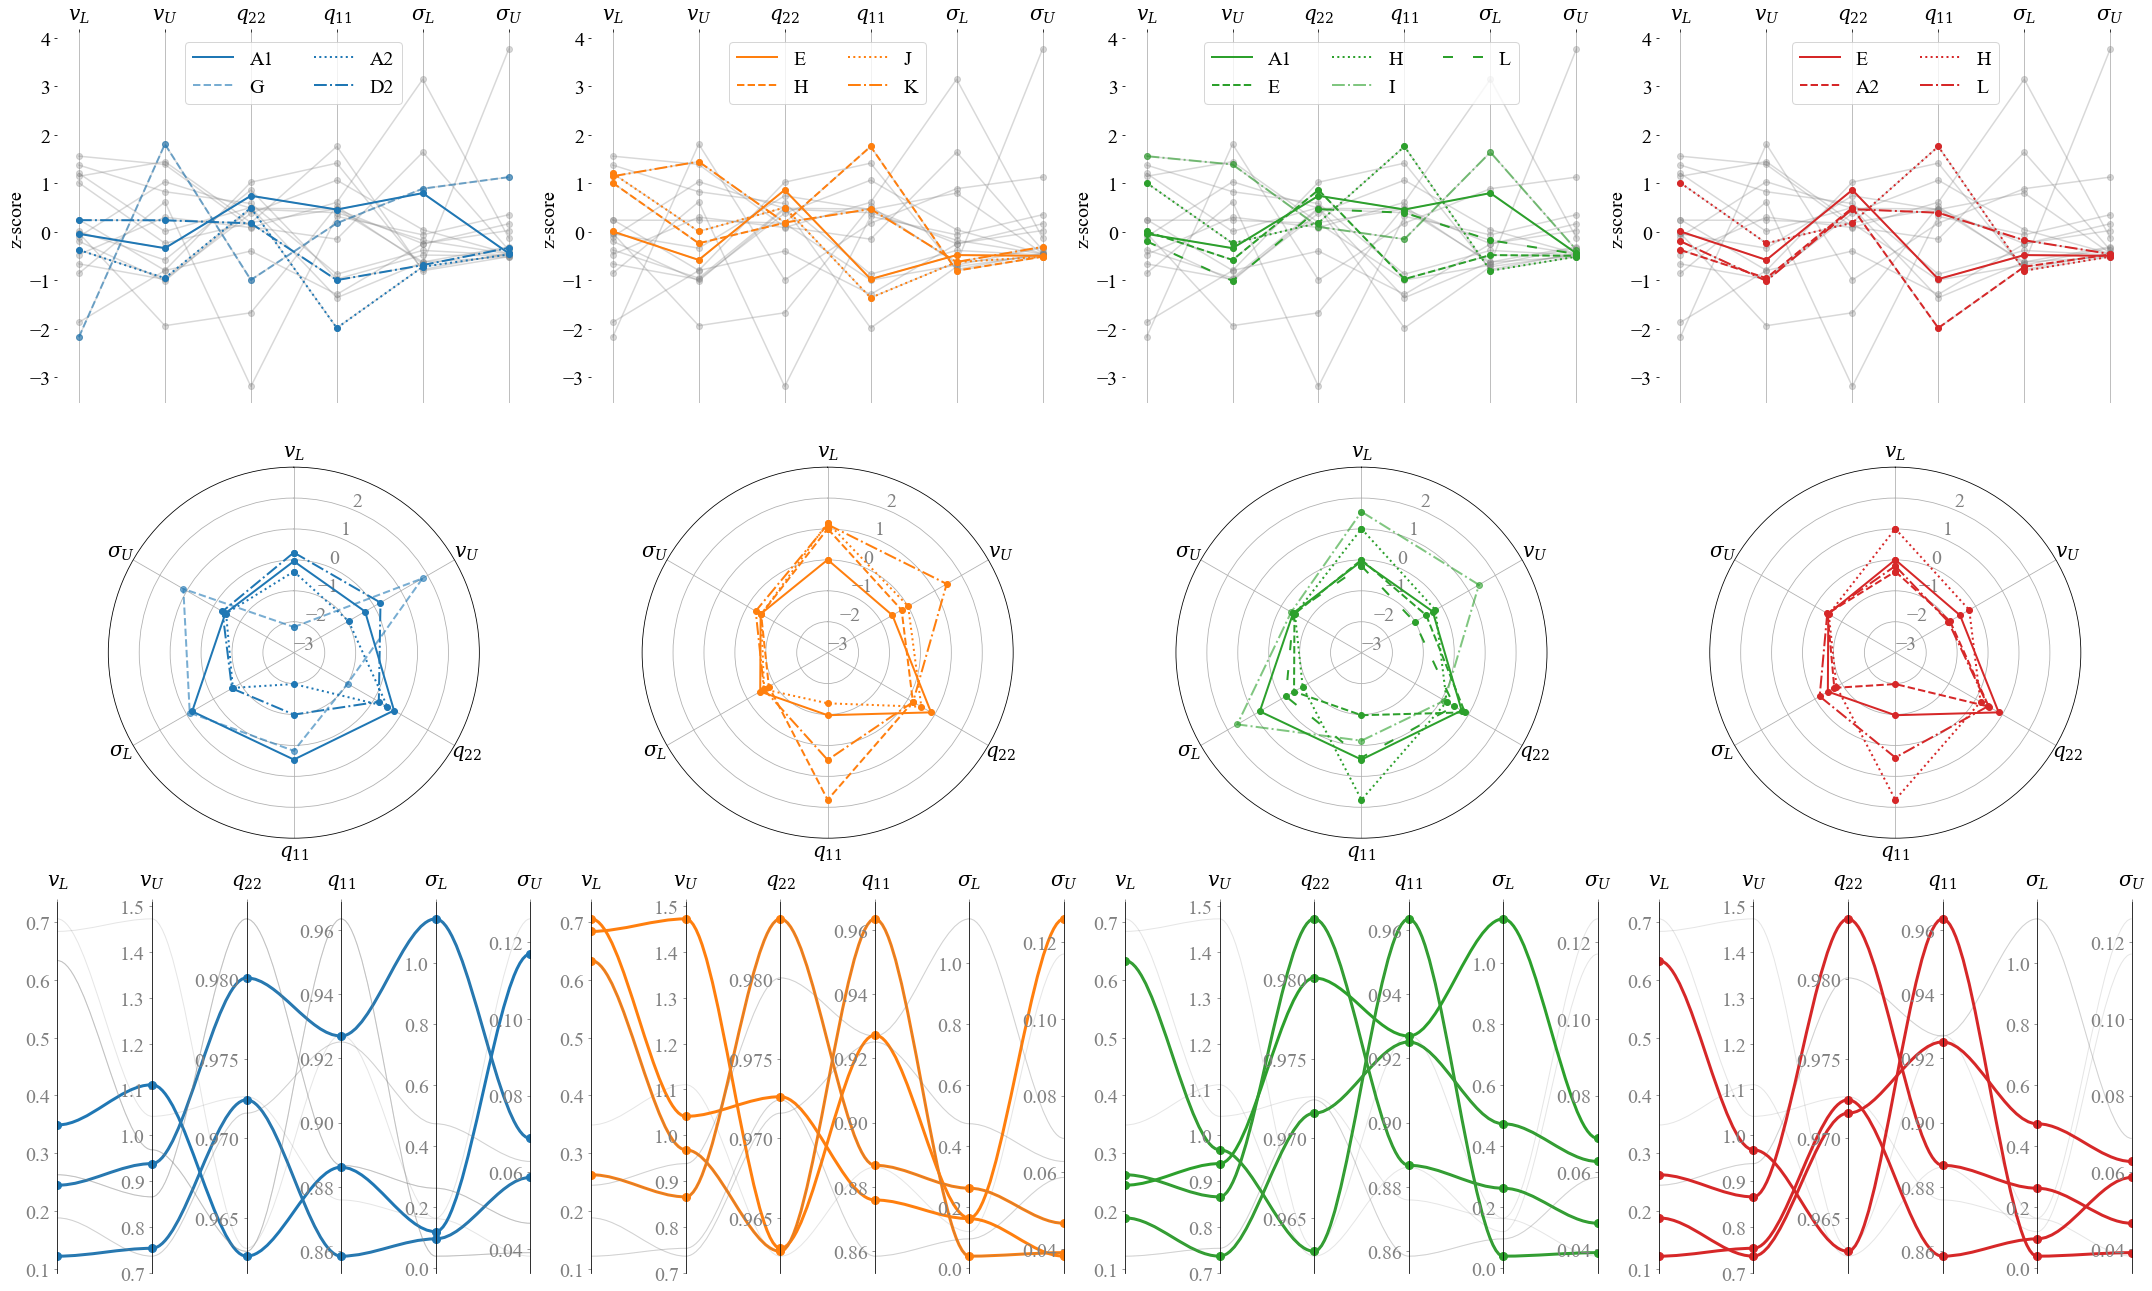

In [22]:
ls_ = ['-','--',':','-.',(0, (5, 10))]
order_ = np.array([0,1,7,4,2,3])
axes_ = ['$v_{\it{L}}$','$v_{\it{U}}$',
         '$\sigma_{\it{L}}$','$\sigma_{\it{U}}$','$q_{11}$','P(c|s)','P(s|c)','$q_{22}$']

# Experts' top scorers
Expert_A_top = np.array(subject_names)[np.where(Expert_A_score >= 3)[0]]
Expert_B_top = np.array(subject_names)[np.where(Expert_B_score >= 3)[0]]
Expert_C_top = np.array(subject_names)[np.where(Expert_C_score >= 3)[0]]
Expert_D_top = np.array(subject_names)[np.where(Expert_D_score >= 3)[0]]
Expert_A_top_nooutlier = Expert_A_top[np.where(Expert_A_top != 'G')[0]]
Expert_C_top_noontlier = Expert_C_top[np.where(Expert_C_top != 'I')[0]]

fig = plt.figure(figsize=(30,18))

# Expert A, parallel plot (standardized)
ax = plt.subplot(3,4,1)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_A_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_A_top[i])[0][0]
    if Expert_A_top[i] == 'G':
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[0],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[0],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=2,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)

# Expert B, parallel plot (standardized)
ax = plt.subplot(3,4,2)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_B_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_B_top[i])[0][0]
    plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
             c=colors[1],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=2,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)

# Expert C, parallel plot (standardized)
ax = plt.subplot(3,4,3)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_C_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_C_top[i])[0][0]
    if Expert_C_top[i] == 'I':
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[2],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[2],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=3,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)

# Expert D, parallel plot (standardized)
ax = plt.subplot(3,4,4)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_D_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_D_top[i])[0][0]
    plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
             c=colors[3],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=2,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)


# Radar chart
categories=list(np.array(axes_)[order_])
N = len(categories) # number of axes
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Expert A, radar chart
ax = plt.subplot(3,4,5, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_A_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_A_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    if Expert_A_top[i] == 'G':
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[0],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[0],linewidth=2,label=subject_names[indx_])

        
# Expert B, radar chart
ax = plt.subplot(3,4,6, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_B_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_B_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[1],linewidth=2,label=subject_names[indx_])


# Expert C, radar plot
ax = plt.subplot(3,4,7, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_C_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_C_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    if Expert_C_top[i] == 'I':
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[2],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[2],linewidth=2,label=subject_names[indx_])
        

# Expert D, radar chart
ax = plt.subplot(3,4,8, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_D_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_D_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[3],linewidth=2,label=subject_names[indx_])


# Parallel plot, parameters
y1, y2, y3, y4, y5, y6 = [], [], [], [], [], [] 
category = []
order_ = np.array([0,1,7,4,2,3])

for i in range(Expert_A_top_nooutlier.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_A_top_nooutlier[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(1)

for i in range(Expert_B_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_B_top[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(2)

for i in range(Expert_C_top_noontlier.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_C_top_noontlier[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(3)

for i in range(Expert_D_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_D_top[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(4)

y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y5 = np.array(y5)
y6 = np.array(y6)

ysubject_names = np.array(axes_)[order_]
N = Expert_A_top_nooutlier.shape[0] + Expert_B_top.shape[0] + Expert_C_top_noontlier.shape[0] + Expert_D_top.shape[0]

ys = np.dstack([y1, y2, y3, y4, y5, y6])[0]
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  
ymaxs += dys * 0.05  
dys = ymaxs - ymins
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


# Expert A, parallel plot
host = plt.subplot(3,4,9)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray',grid_alpha=0.2)
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7, grid_alpha=0.7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 1:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)

    
# Expert B, parallel plot
host = plt.subplot(3,4,10)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray')
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 2:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)


# Expert C, parallel plot
host = plt.subplot(3,4,11)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray')
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 3:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)


# Expert D, parallel plot
host = plt.subplot(3,4,12)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray')
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 4:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)

plt.subplots_adjust(wspace = 0.25)
fig.tight_layout()

# plt.savefig("./figures/parallel_coordinates_standardized.pdf", bbox_inches='tight')
plt.show()

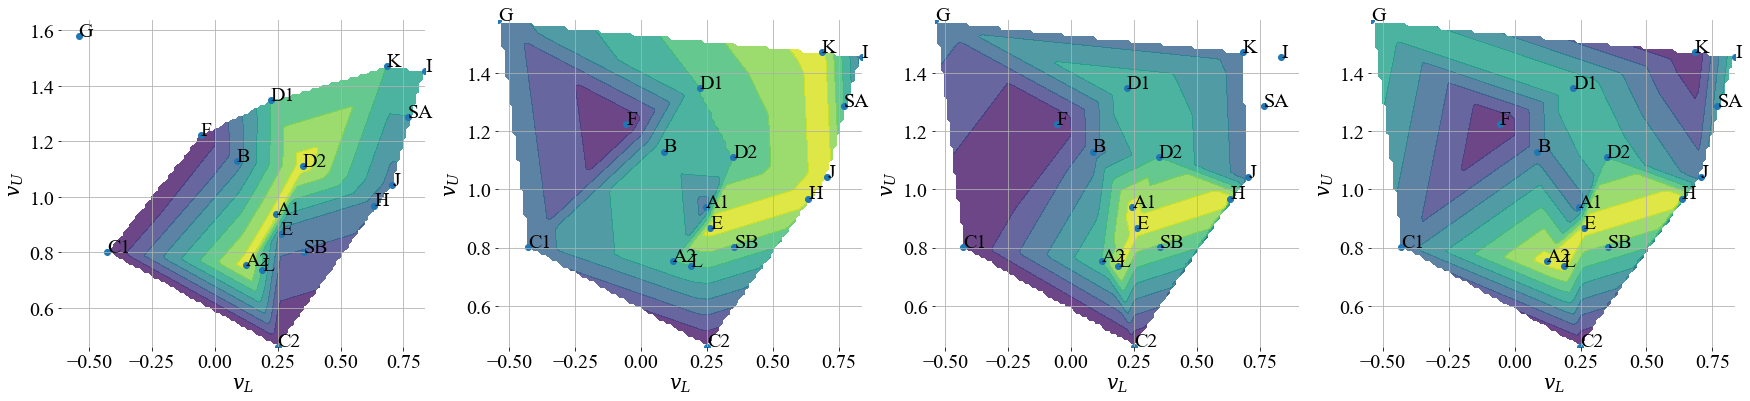

In [23]:
from scipy.interpolate import griddata

Score = [Expert_A_score,Expert_B_score,Expert_C_score,Expert_D_score]

fig = plt.figure(figsize=(30,6))

# Expert A
ax = plt.subplot(1,4,1)
x = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),0]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),0]),100)
y = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),1]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),0]
py = model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),1]
Ti = griddata((px, py), Expert_A_score[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert B
ax = plt.subplot(1,4,2)
x = np.linspace(np.min(model_parameters[:-3,0]),np.max(model_parameters[:-3,0]),100)
y = np.linspace(np.min(model_parameters[:-3,1]),np.max(model_parameters[:-3,1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[:-3,0]
py = model_parameters[:-3,1]
Ti = griddata((px, py), Expert_B_score, (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()

ax = plt.subplot(1,4,3)
x = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),0]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),0]),100)
y = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),1]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),0]
py = model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),1]
Ti = griddata((px, py), Expert_C_score[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert A
ax = plt.subplot(1,4,4)
x = np.linspace(np.min(model_parameters[:-3,0]),np.max(model_parameters[:-3,0]),100)
y = np.linspace(np.min(model_parameters[:-3,1]),np.max(model_parameters[:-3,1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[:-3,0]
py = model_parameters[:-3,1]
Ti = griddata((px, py), Expert_D_score, (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()

# plt.savefig("./figures/parameter_plot.pdf", bbox_inches='tight')
plt.show()

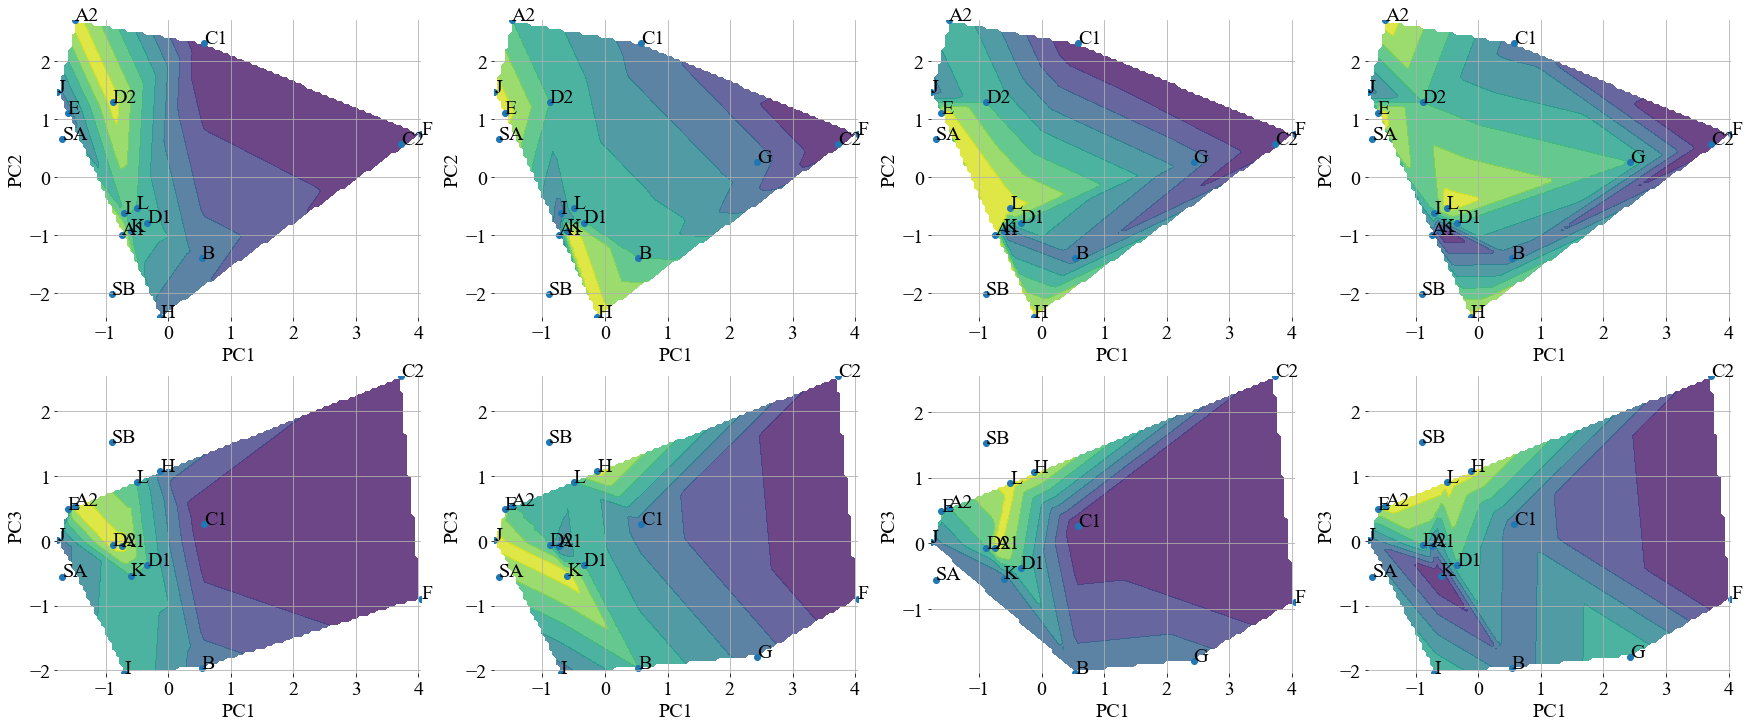

In [24]:
from sklearn.decomposition import PCA
from scipy.interpolate import griddata

# PCA of model parameters
pca = PCA(n_components=6)
X_pca = pca.fit_transform(model_parameters_standard)

# Plot PCA
fig = plt.figure(figsize=(30,12))

# PC1 vs PC2
PC0 = 0
PC1 = 1
PCA_axis = ['PC'+str(PC0+1),'PC'+str(PC1+1)]

# Expert A
ax = plt.subplot(2,4,1)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]
Ti = griddata((px, py), Expert_A_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert B
ax = plt.subplot(2,4,2)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_B_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],
            X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert C
ax = plt.subplot(2,4,3)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]
Ti = griddata((px, py), Expert_C_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0])], 
              (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert D
ax = plt.subplot(2,4,4)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_D_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# PC1 vs PC3
PC0 = 0
PC1 = 2
PCA_axis = ['PC'+str(PC0+1),'PC'+str(PC1+1)]


# Expert A
ax = plt.subplot(2,4,5)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]
Ti = griddata((px, py), Expert_A_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert B
ax = plt.subplot(2,4,6)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_B_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],
            X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert C
ax = plt.subplot(2,4,7)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]
Ti = griddata((px, py), Expert_C_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert D
ax = plt.subplot(2,4,8)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_D_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],
            X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# plt.tight_layout()
# plt.savefig("./figures/parameter_pca.pdf", bbox_inches='tight')
plt.show()

# Elliptical excision force features

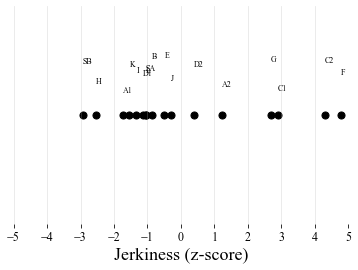

In [25]:
# Jerkiness feature

PC0 = 0
PC1 = 1
PC2 = 2
PCA_axis = ['PC1','PC2','PC3']

ax = plt.subplot(1,1,1)
ax_ = np.array([1,1])
proj_ = []

for i in np.delete(np.arange(18),15):
    proj_.append(np.dot(ax_,np.hstack((X_pca[:,PC0][i],X_pca[:,PC1][i]))))

ax.scatter(proj_,np.zeros(len(proj_)),s=50,c='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Jerkiness (z-score)',fontsize=18)
ax.tick_params(labelsize=12)
ax.get_xaxis().set_ticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ax.get_yaxis().set_ticks([])
ax.set_xlim([-5,5])
plt.grid(alpha=0.3)

# plt.savefig("./figures/jerkiness.pdf", bbox_inches='tight')

for i in range(len(proj_)):
    plt.text(proj_[i],
             np.zeros(len(proj_))[i]+0.01+0.02*np.random.rand(),
             np.delete(np.array(subject_names),15)[i],size=8)

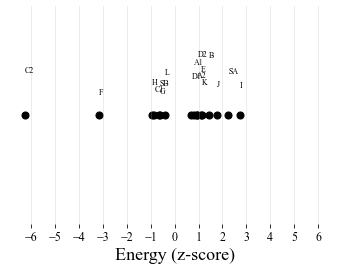

In [26]:
# Energy feature

ax = plt.subplot(1,1,1)
ax_ = np.array([-1,-1])
proj_ = []

for i in np.delete(np.arange(18),15):
    proj_.append(np.dot(ax_,np.hstack((X_pca[:,PC0][i],X_pca[:,PC2][i]))))

ax.scatter(proj_,np.zeros(len(proj_)),s=50,c='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Energy (z-score)',fontsize=18)
ax.tick_params(labelsize=12)
ax.get_xaxis().set_ticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
ax.get_yaxis().set_ticks([])
ax.set_xlim([-7,7])
plt.grid(alpha=0.3)

# plt.savefig("./figures/energy.pdf", bbox_inches='tight')

for i in range(len(proj_)):
    plt.text(proj_[i],
             np.zeros(len(proj_))[i]+0.01+0.02*np.random.rand(),
             np.delete(np.array(subject_names),15)[i],size=8)

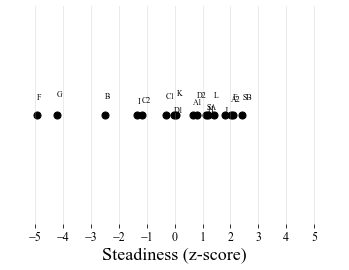

In [27]:
# Steadiness feature

ax = plt.subplot(1,1,1)
ax_ = np.array([-1,1])
proj_ = []

for i in np.delete(np.arange(18),15):
    proj_.append(np.dot(ax_,np.hstack((X_pca[:,PC0][i],X_pca[:,PC2][i]))))

ax.scatter(proj_,np.zeros(len(proj_)),s=50,c='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Steadiness (z-score)',fontsize=18)
ax.tick_params(labelsize=12)
ax.get_xaxis().set_ticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ax.get_yaxis().set_ticks([])
ax.set_xlim([-6,6])
plt.grid(alpha=0.3)

# plt.savefig("./figures/steadiness.pdf", bbox_inches='tight')

for i in range(len(proj_)):
    plt.text(proj_[i],
             np.zeros(len(proj_))[i]+0.01*np.random.rand(),
             np.delete(np.array(subject_names),15)[i],size=8)

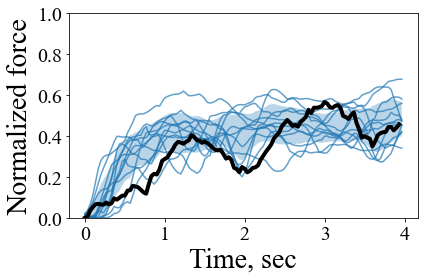

In [28]:
# Mini-Plot of synthetic force vs actual measurement

subject_of_interest = 'D2'
t = np.arange(0,(T)*dt,dt)

for subject in np.where(np.array(subject_names)==subject_of_interest)[0]:
    
    for i in range(1):
        
        m_ = Models[subject]
        
        virtual_velocity_sample, _ = m_.sample(T)
        virtual_velocity_sample = virtual_velocity_sample.reshape(-1)
        
        Z = [np.array([0,0,1])]
        Y = []
        for i in range(virtual_velocity_sample.shape[0]-1):
            z, y = step(Z[-1],virtual_velocity_sample[i],dt)
            Z.append(z)
            Y.append(y)
        
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.3)
    
        for i in range(force[subject].shape[0]):
            plt.plot(t,force[subject][i,:T], color='tab:blue',alpha=0.7)
        
        plt.plot(t[:-1],np.array(Y),lw=4,c='k')
            
        plt.ylabel('Normalized force',size=28)
        plt.xlabel('Time, sec',size=28)
        plt.xticks(ticks=[0,1,2,3,4],size=20)
        plt.yticks(size=20)
        plt.ylim([0,1])
        
        plt.tight_layout()
#         plt.savefig('./figures/'+str(subject_of_interest)+'_mini.pdf')
        plt.show()